In [16]:
# Modeling using XBoost Regressor

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import recall_score, precision_score


df = pd.read_csv(r'C:\Users\viksaraw\OneDrive\Berkeley\Capstone-1\May\Data\AfterEDA.csv')
df.head(5)
#df.shape

,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
#df.describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_sold      21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Preprocessing
df['date_sold'] = pd.to_datetime(df['date_sold'])
df['date_sold'] = df['date_sold'].map(pd.Timestamp.toordinal)


# Features and target
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Fit the model
xgb_regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 134909.11845007134


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8796079768552454

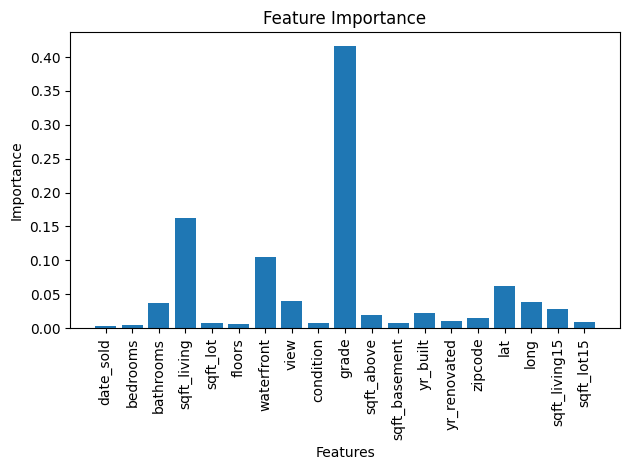

In [21]:

# Get feature importance
importance = xgb_regressor.feature_importances_

# Plot feature importance
plt.bar(range(len(importance)), importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(range(len(importance)), X_train.columns, rotation=90)

plt.tight_layout()
plt.show()


In [22]:

# Predict

y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Accuracy (R² score)
train_accuracy = xgb_regressor.score(X_train, y_train)
test_accuracy = xgb_regressor.score(X_test, y_test)

# Convert to binary using median threshold
threshold_train = np.median(y_train)
threshold_test = np.median(y_test)

y_train_binary = (y_train >= threshold_train).astype(int)
y_test_binary = (y_test >= threshold_test).astype(int)
y_train_pred_binary = (y_train_pred >= threshold_train).astype(int)
y_test_pred_binary = (y_test_pred >= threshold_test).astype(int)

# Recall and Precision
train_recall = recall_score(y_train_binary, y_train_pred_binary)
test_recall = recall_score(y_test_binary, y_test_pred_binary)
train_precision = precision_score(y_train_binary, y_train_pred_binary)
test_precision = precision_score(y_test_binary, y_test_pred_binary)

# Output results
print(f"Training Accuracy (R²): {train_accuracy:.4f}")
print(f"Test Accuracy (R²): {test_accuracy:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")


Training Accuracy (R²): 0.9578
Test Accuracy (R²): 0.8796
Training Recall: 0.9362
Test Recall: 0.9244
Training Precision: 0.9120
Test Precision: 0.9098
